<center> </center>

<center><font size=5 face="Helvetica" color=#306998><b>
Meep Tutorial: Band Diagram of a Waveguide Cavity
</b></font></center>

<center><font face="Helvetica" size=3><b>Ang Chen</b></font></center>
<center><font face="Helvetica" size=3>February, 2025</font></center>

***

In [1]:
from IPython.display import Video
import matplotlib.pyplot as plt
import meep as mp
import numpy as np

plt.rcParams["font.family"] = "Helvetica"
%matplotlib inline
%config InlineBackend.figure_format='svg'

Using MPI version 3.1, 1 processes


In this tutorial, we consider a smaller, more abstract calculation that we really should have done first. In particular, we compute the band diagram of the infinite periodic waveguide by itself with no defects. This is very similar to the types of calculations that `MPB` performs, but with a different method that has its own strengths and weaknesses.

Let's briefly review the problem. In a periodic system of this sort, the eigen-solutions can be expressed in the form of Bloch modes: a periodic envelope multiplied by a planewave $\exp[i(k\cdot x-\omega t)]$, where $k$ is the Bloch wavevector. We wish to find the bands $\omega(k)$. In this case, there is only one direction of periodicity, so we only have one wavevector component $k_x$. We just need to look for solutionsin the irreducible Brillouin zone $k_x\in[0, \pi/a]$.

Solving for these eigenmodes is very similar to solving for the resonant modes of a cavity. We put in a pulse and analyse the response via `Harminv` except that our computational cell and boundary conditions are different. In particular, our computational cell is simply the unit cell of the periodicity. The $\epsilon$ function then obeys periodic boundary conditions, but the fields obey Bloch-periodic boundary conditions: the fields at the right side are $\exp(ik_x\cdot1)$ times the field at the left side. For each $k_x$, we will do a seprate computation to get the frequencies at that $k_x$.

In [2]:
# Some parameters to describe the geometry:
eps = 13  # dielectric constant of waveguide
w = 1.2  # width of waveguide
r = 0.36  # radius of holes

# The cell dimensions
sy = 12  # size of cell in y direction (perpendicular to wvg.)
dpml = 1  # PML thickness (y direction only!)
cell = mp.Vector3(1, sy)

b = mp.Block(size=mp.Vector3(1e20, w, 1e20), material=mp.Medium(epsilon=eps))
c = mp.Cylinder(radius=r)

geometry = [b, c]

resolution = 20

In [3]:
pml_layers = [mp.PML(dpml, direction=mp.Y)]

In [4]:
fcen = 0.25  # pulse center frequency
df = 1.5  # pulse freq. width: large df = short impulse

s = [
    mp.Source(
        src=mp.GaussianSource(fcen, fwidth=df),
        component=mp.Hz,
        center=mp.Vector3(0.1234, 0),
    )
]

In [5]:
sym = [mp.Mirror(direction=mp.Y, phase=-1)]

In [6]:
sim = mp.Simulation(
    cell_size=cell,
    geometry=geometry,
    boundary_layers=pml_layers,
    sources=s,
    symmetries=sym,
    resolution=resolution,
)


     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


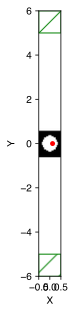

In [7]:
f = plt.figure()
sim.plot2D(ax=f.gca())
plt.show()

In [8]:
kx = 0.4
sim.k_point = mp.Vector3(kx)

sim.run(
    mp.after_sources(mp.Harminv(mp.Hz, mp.Vector3(0.1234), fcen, df)),
    until_after_sources=300,
)

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000689983 s
Working in 2D dimensions.
Computational cell is 1 x 12 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.00363803 s
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.18898177027126958, -3.218627335397059e-09, 29357510.295294292, 0.9173627866268506, 0.6215559434881994-0.6747019278187033i, 2.3491920957669943e-09+0.0i
harminv0:, 0.31397716832842343, -4.607663505321441e-08, 3407119.1175940665, 0.16813132069983308, -0.1601862501837655+0.05107353769158944i, 8.561659548794918e-09+0.0i
harminv0:, 0.3953135319403153, 0.0001231747463847505, -1604.685796167617, 0.0394703410921249, 0.013611923045768385+0.03704893219682266i, 1.4827916641632791e-08+0.0i
harminv0:, 0.5829248393897576, -0.0014124994042536267, 206.34516291983098, 0.03141667034401814, -0.030763086684721566+0.006374925343328781i, 1.75467291108745e-08+0.0i
harminv0:, 0.7249956125507101, -0.0020329701066958326, 178.30946214183118, 0.07900563017185246, 0.0697368632895715+0.03713030429963021i, 4.6641214114986684e-08+0.0i
harminv0:, 0.7767057476814351, -0.005004962007789874, 77.59357078760506, 0.048909310395509886, 0.03731786344555

In [16]:
sim.restart_fields()
k_interp = 19
kpts = mp.interpolate(k_interp, [mp.Vector3(0), mp.Vector3(0.5)])
all_freqs = sim.run_k_points(300, kpts)

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv74:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv74:, 0.4638833563782045, -7.790697832641596e-07, 297716.17789783754, 0.03767842188282603, 0.03581485341271778-0.011702980415507895i, 1.8236309746692277e-07+0.0i
harminv74:, 0.6352148239533016, -3.2201841182257626e-08, 9863020.25958827, 0.10645138699666688, -0.07636361988460977+0.07416532445579248i, 3.6009615485772e-09+0.0i
harminv74:, 0.640205990994217, -0.0053320306370559355, 60.03397528748117, 0.006520214707776699, 0.0010460054021789638-0.00643576510868133i, 1.5106704441159545e-05+0.0i
harminv74:, 0.6995389265797937, -5.9521337383388684e-08, 5876371.040471801, 0.08146363569377253, 0.04260251388608313+0.06943593990891017i, 1.8873814667866518e-08+0.0i
harminv74:, 0.7003973406194588, -0.003728480062930706, 93.9253165898551, 0.00835614708144103, -0.0010566817512523085+0.00828906615507717i, 1.191911772996753e-05+0.0i
harminv74:, 0.8170552050508685, 4.283789570032347e-08, -9536593.612891901, 0.023685481245768688, 0.00292

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv75:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv75:, 0.4644214252364061, -0.0004617199273830742, 502.9254724488971, 0.041440296887956335, 0.03849760545018999-0.015337293788783794i, 2.649050033930978e-08+0.0i
harminv75:, 0.6357886486031067, -0.00038251384470661023, 831.0661919841873, 0.10975152349839432, -0.07160344071265609+0.0831765843752179i, 1.669387885605457e-08+0.0i
harminv75:, 0.6402335512504123, -0.004905359343498642, 65.25857805901121, 0.0129180993940348, -0.0024774102667946846-0.01267831733015634i, 6.074755597370992e-06+0.0i
harminv75:, 0.695327998594577, -0.002078070796549574, 167.30132576548849, 0.04554811789734308, 0.02973143124786843+0.03450613046899837i, 2.5013046199368326e-07+0.0i
harminv75:, 0.7047710156164457, -0.0016771499176826612, 210.1097248927623, 0.044530378512746036, 0.012011689691722918+0.04287976120780281i, 1.6294144207767606e-07+0.0i
harminv75:, 0.8168476073287471, -9.964467719029732e-06, 40988.02015128038, 0.023499513183822082, 0.002813

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv76:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv76:, 0.04704789045157463, -0.00013121050868117174, 179.28400295244734, 0.005119738680466749, 0.0031270928458492237+0.004053765470486177i, 2.840865703429648e-06+0.0i
harminv76:, 0.04965397750192186, 0.0003684647246428888, -67.37955383659296, 0.0029606690758540158, -0.0009428772708568228+0.0028065180970055868i, 2.9109756567310864e-06+0.0i
harminv76:, 0.4661622077822323, -0.001902167088818592, 122.53450564949023, 0.05420871834351575, 0.04713476319451245-0.026774974193150124i, 1.2322787262140763e-07+0.0i
harminv76:, 0.63703225317743, -0.002256016571067906, 141.18518927276426, 0.1171142388969118, -0.0011640353888448807+0.11710845389644783i, 1.06102461280247e-06+0.0i
harminv76:, 0.6405661128093347, -0.0030211983297515617, 106.01192687373317, 0.07907156357494684, -0.06818832805059273-0.04003328719767598i, 2.959074607357096e-06+0.0i
harminv76:, 0.6905067121556995, -0.0025824351786802825, 133.69294181249757, 0.044107306119172

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv77:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv77:, 0.07026831011323569, 0.00025743352625942124, -136.47855260783868, 0.024697812773635912, 0.015150991730158353+0.019504599595845242i, 7.096395028501421e-07+0.0i
harminv77:, 0.07387604750329321, 0.00027379490764992164, -134.9112884118215, 0.008352864099242378, -0.007032172748453464+0.004507647401507869i, 2.7015892978056276e-06+0.0i
harminv77:, 0.4700803278184972, -0.004308993558580824, 54.54641802404076, 0.08497387699736084, 0.07367510300451338-0.042338386474179125i, 6.922527465289669e-07+0.0i
harminv77:, 0.6360032253579883, -0.003984043362577614, 79.8188131349183, 0.03665960502195921, 0.009069967144093027+0.03551988649152936i, 1.2105350636875272e-06+0.0i
harminv77:, 0.6438267047730283, -0.0013103557593997469, 245.66866675503263, 0.0878155610480139, -0.07262744769030938+0.049364223929571i, 8.203516250734382e-08+0.0i
harminv77:, 0.6861892683017297, -0.0031221939864401298, 109.88895489548209, 0.04558540570793472, 0.0

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv78:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv78:, 0.09102530830140335, 0.0008064526574050341, -56.43561805245974, 0.08249354268101376, 0.024560234253607333+0.07875264743151288i, 8.719503347527923e-08+0.0i
harminv78:, 0.09849393391385938, -0.0005714864460304395, 86.17346447846745, 0.00929975855771725, -0.00929652469655494-0.0002452300923201551i, 3.2874668471529314e-06+0.0i
harminv78:, 0.4738160764532907, 0.0038298625650763233, -61.858104357832, 5.800349637663205e-05, -2.5587836393670595e-05+5.2054473588777305e-05i, 0.003298086562859992+0.0i
harminv78:, 0.4758134815353238, -0.0042595321004003164, 55.852787386037804, 0.08708906321701056, 0.0655028993103212-0.057392291415819814i, 0.00010425249518153219+0.0i
harminv78:, 0.6348249299700918, -0.004379872827676948, 72.47070348236552, 0.021567357142611772, 0.0031370316929942455+0.02133799255492692i, 2.23852633444708e-06+0.0i
harminv78:, 0.6475306730413513, -0.0008191801142111967, 395.23095214833813, 0.08936396191397282,

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv79:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv79:, 0.10570618467287114, -0.0003217011683842674, 164.2925097284798, 0.24773279970148784, 0.15918527619269612+0.18981988276098094i, 3.422199447435991e-08+0.0i
harminv79:, 0.12375303640991818, -0.0012230597264206592, 50.59157526676443, 0.008740618184193623, -0.008641319590948927-0.00131377394133789i, 3.7793815269923417e-06+0.0i
harminv79:, 0.48084488522292773, -0.003116363943520103, 77.14838413253287, 0.09916942425418197, 0.08179632246076321-0.05607081539268695i, 2.823896754866166e-07+0.0i
harminv79:, 0.6333342887171901, -0.00418661278352107, 75.63803024846932, 0.015196489763711764, 0.0016193430980345992+0.015109964562150507i, 5.535678526875037e-06+0.0i
harminv79:, 0.6513728809973425, -0.0007812987783268661, 416.8526171205867, 0.0848953198170782, -0.042603340823990685+0.0734314011678851i, 2.7078326521696016e-07+0.0i
harminv79:, 0.6794756578520861, -0.0042746110310183955, 79.47806863847046, 0.05553770614254178, 0.00404

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv80:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv80:, 0.1169168837917951, 4.31777678587295e-05, -1353.9014357380374, 0.30968934065033005, 0.23944662805973116+0.19639959272682045i, 6.627077619541445e-08+0.0i
harminv80:, 0.14906557475893653, -0.00013226495864598935, 563.5112137218237, 0.0021823267387495924, -0.002182263180268879+1.6655530738731046e-05i, 2.874194654887829e-05+0.0i
harminv80:, 0.48489836917146084, -0.002093957853919949, 115.7851310769501, 0.12205436103893487, 0.093498561160752-0.07845563147086244i, 4.787393411484323e-07+0.0i
harminv80:, 0.6311820319720088, -0.004137398522500578, 76.27764506361022, 0.01886080866441245, 0.0044283593499193225+0.01833356858179983i, 8.749048068885005e-06+0.0i
harminv80:, 0.6549048379226713, -0.0011794614919712777, 277.6287493829513, 0.06964317707159988, -0.025061229419855637+0.06497774151654993i, 2.559750661252982e-07+0.0i
harminv80:, 0.6775877370428846, -0.004667571317811201, 72.58461530702769, 0.0713512863943595, 0.005598

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv81:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv81:, 0.12620515587583653, -6.4706527498186524e-06, 9752.11935761609, 0.38880353661054157, 0.3429580391771147+0.18316105875609423i, 6.683015366646358e-08+0.0i
harminv81:, 0.1747507376771845, -0.001708107591595669, 51.153316845204394, 0.010369056201987966, -0.010323340804140982-0.0009726053472724404i, 7.986841771268779e-07+0.0i
harminv81:, 0.48840261703751653, -0.0011919292422959444, 204.87903128240012, 0.14696230604917504, 0.10002049623025465-0.10767460115154831i, 1.375644027803738e-07+0.0i
harminv81:, 0.6286844886442081, -0.003481392925587817, 90.2920902756269, 0.016410645109149604, 0.0014556850638141883+0.016345955276258532i, 4.469414834252827e-06+0.0i
harminv81:, 0.657480625633646, -0.0022447041295466704, 146.45151157770346, 0.04499131364386901, -0.008802540091767619+0.04412180403534989i, 6.965711061026792e-07+0.0i
harminv81:, 0.6775514083556184, -0.004456787846010754, 76.01342399123743, 0.0921279058058435, 0.00250

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv82:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv82:, 0.13453014845764466, 9.106019256208589e-07, -73868.80297113387, 0.45085373746804286, 0.4284543991533807+0.1403421548752136i, 3.2559800458499574e-08+0.0i
harminv82:, 0.20011464500553125, -0.0015030813114188023, 66.56813689494855, 0.010876794604292188, -0.01086689974619308+0.0004638434759144645i, 1.5636546367982605e-06+0.0i
harminv82:, 0.4913969874493301, -0.0004989516335374039, 492.42948055454406, 0.17914123000421192, 0.10996522558690994-0.14141863190203038i, 4.292980387288874e-09+0.0i
harminv82:, 0.6256860255937584, -0.0027580987267860667, 113.42705384641042, 0.014492541086007664, -0.0021972901927260575+0.014325001324208319i, 1.1609739688622905e-06+0.0i
harminv82:, 0.6584912389213327, -0.003825015798114452, 86.07693061633066, 0.01956455816703474, -0.0031981093141598346+0.01930139977011952i, 1.2701846985393591e-06+0.0i
harminv82:, 0.6797526377136537, -0.0036741596997926706, 92.5045035130089, 0.1096742257978275, 0

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv83:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv83:, 0.14236089900596216, 2.915907077295556e-07, -244110.82937869022, 0.5084107262914845, 0.5025062042439505+0.0772591826553447i, 1.1249008927228483e-08+0.0i
harminv83:, 0.22534931721209192, -0.0011994684578581812, 93.93715847037973, 0.012471593782335158, -0.012258465258223833+0.002295796372612408i, 1.8237322215663134e-06+0.0i
harminv83:, 0.4938023384477184, -7.607427729706411e-05, 3245.527634258416, 0.21604985364751128, 0.12518450807634196-0.17608628055244768i, 4.958260669952778e-09+0.0i
harminv83:, 0.6220942916974475, -0.002228872183977942, 139.55360387403982, 0.01514641809045157, -0.005149132506182487+0.01424431168588126i, 5.612062111305227e-07+0.0i
harminv83:, 0.6581013510721659, -0.005233898790378571, 62.86913230744429, 0.0073258190020659576, -0.00410473583620432+0.006067847045370433i, 7.79868671228288e-06+0.0i
harminv83:, 0.6838073169114206, -0.002925421971003593, 116.87327908404855, 0.11722320433431305, 0.0260

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv84:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv84:, 0.14989889831073042, 2.3682035260412624e-07, -316482.29694452084, 0.5639523399116058, 0.5639436684789456-0.00312737498303051i, 1.3570015298993053e-08+0.0i
harminv84:, 0.2503977919956943, -0.0007980224504670634, 156.88643336358675, 0.01562218476037742, -0.014689865263995851+0.005316062002367597i, 1.20104380807671e-06+0.0i
harminv84:, 0.49550285939305105, -4.2854088116776415e-05, 5781.27876671669, 0.256062309553366, 0.14451537243133517-0.21138404269205455i, 4.175209780340765e-09+0.0i
harminv84:, 0.6180350025319203, -0.001794885802666281, 172.16554992352073, 0.016260579016456885, -0.008491695039156297+0.013867139045686615i, 3.0730749423769045e-07+0.0i
harminv84:, 0.6888723944245513, -0.002423865498725381, 142.1020256253499, 0.11688241332872651, 0.04079809965468692+0.1095308797103059i, 9.08772212345719e-08+0.0i
harminv84:, 0.7485992425803645, -0.00026245642587354844, 1426.140053703695, 0.0013668131869349438, 0.00136

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv85:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv85:, 0.1572179859110632, 5.107591976984087e-09, -15390617.20469464, 0.6196493659559617, 0.6118074893187646-0.09826969391981928i, 3.2452377095295696e-08+0.0i
harminv85:, 0.27520314238990734, -0.0003009361007529563, 457.24514556634466, 0.023342184426633272, -0.02096605718099171+0.010260702709383349i, 2.5425000154920906e-07+0.0i
harminv85:, 0.49641965266017063, -0.0005483039179037754, 452.6865817027499, 0.29601474066858724, 0.16759161895075103-0.244003639215806i, 3.8384193387716944e-08+0.0i
harminv85:, 0.6134949323993659, -0.0014815880962223218, 207.03964008742517, 0.01807991645249648, -0.011546743170621716+0.013912444108816884i, 6.861998973467912e-07+0.0i
harminv85:, 0.6943224750177146, -0.0020835237528652618, 166.6221645092556, 0.11335308631109993, 0.0530938808140355+0.10014969793442546i, 1.794296328005372e-07+0.0i
harminv85:, 0.7244663147758433, -0.00035059968880187323, 1033.1816283859357, 0.0003261108733985202, 0.00

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv86:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv86:, 0.16431793643490494, -7.320404946097871e-09, 11223281.884323511, 0.6764180434145166, 0.6445330124255373-0.2052280812909995i, 4.048465861921364e-08+0.0i
harminv86:, 0.2993423616007289, 0.00032401574118459247, -461.9256467391702, 0.050713618087076855, -0.04734819161229948+0.018166447383207916i, 1.3576111851523121e-07+0.0i
harminv86:, 0.49649781788387887, -0.0017761620807796987, 139.76703569359125, 0.33634826468330153, 0.19514299962254306-0.27395139140691444i, 1.1515159048296562e-07+0.0i
harminv86:, 0.608613441724494, -0.0011873219147615726, 256.29672717980213, 0.018916269696694903, -0.01461213746913944+0.012012938767057337i, 4.92720429503428e-07+0.0i
harminv86:, 0.6991552086565351, -0.0020524948135953363, 170.3183861965116, 0.1110980267920265, 0.08014692544587561+0.07693660961242767i, 2.3923596836042955e-06+0.0i
harminv86:, 0.6992344433431974, -1.156496527951754e-06, 302307.19524147484, 0.011476976995783235, -0.01

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv87:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv87:, 0.17114941743999662, -4.2700885129913495e-07, 200404.99970819146, 0.7352306639496266, 0.6613454557585889-0.32122627127816467i, 2.5445760804905763e-07+0.0i
harminv87:, 0.3179134473953353, -7.467443893026781e-05, 2128.6631138414577, 0.2638141550100535, -0.24546994914840173+0.09665615577266465i, 5.290542577102136e-07+0.0i
harminv87:, 0.32510982777554936, -0.0031044573019987517, 52.361781166426894, 0.053576619222869215, 0.04075107134141844+0.034782241329145876i, 2.2955162988966016e-05+0.0i
harminv87:, 0.4956605580705993, -0.0037574166606781515, 65.95762498976367, 0.3140938468125523, 0.1792596897158366-0.25791647533356427i, 8.531996556613564e-06+0.0i
harminv87:, 0.6033576714870487, -0.00098939679378017, 304.911879278389, 0.020118126348388023, -0.017926096367853268+0.009132035741286947i, 1.0078816018564214e-06+0.0i
harminv87:, 0.6595546882826695, 0.0013493507210854344, -244.3970562939024, 1.5056847538219686e-05, -1.11

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv88:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv88:, 0.1776265162883981, 1.0739889020186674e-07, -826947.6339770907, 0.7951618448672854, 0.6616819955147916-0.4409753919940524i, 4.1369851746445285e-08+0.0i
harminv88:, 0.3206672319508081, 9.164956283035367e-07, -174942.04120993658, 0.2888586227764085, -0.26014091654884186+0.1255627631482039i, 2.9185904001609217e-08+0.0i
harminv88:, 0.3505315158504073, -0.0006093706899658085, 287.6176370331132, 0.0023665145092477834, 0.0010157744889688406+0.002137426749631521i, 1.0398601621181987e-06+0.0i
harminv88:, 0.597568600165955, -0.0008772119503461308, 340.60673702072006, 0.021574501390532783, -0.02063693460265518+0.006290949090227504i, 1.131256461073018e-06+0.0i
harminv88:, 0.7130343100800273, -0.0027250505705781235, 130.82955556468002, 0.08959241995031604, 0.06540252045467079+0.061231626066356896i, 6.114069660068588e-07+0.0i
harminv88:, 0.7846516795097621, -0.000447989725600405, 875.747405209077, 0.04030123342474113, 0.01865

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv89:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv89:, 0.1836246333386585, -2.8378653995630416e-08, 3235259.7372470866, 0.856661871096949, 0.6477166662129143-0.5606537984365698i, 4.572396255121598e-08+0.0i
harminv89:, 0.31776352207986613, -1.9395736334956925e-08, 8191581.814482627, 0.22882905051760435, -0.21151744321810825+0.08731039786453088i, 8.396388400405346e-08+0.0i
harminv89:, 0.3739388596418059, 0.00036150092978332775, -517.2031782406937, 0.009201852777995722, 0.0016544793642250559+0.009051894419471596i, 1.1306298876391794e-06+0.0i
harminv89:, 0.590928873375536, -0.0009658485476329874, 305.91176785621826, 0.025161965470283, -0.024359422604276572+0.006304207857770373i, 5.355319188305451e-07+0.0i
harminv89:, 0.7191392721306022, -0.002370671877881281, 151.67414749385563, 0.084138880483412, 0.06826939530437759+0.04917967948021334i, 4.6346536733008465e-07+0.0i
harminv89:, 0.7813603106037296, -0.004815562308427363, 81.1286679061683, 0.04102554847561258, 0.024098461

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv90:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv90:, 0.18898183947755198, 3.933482431528545e-08, -2402220.4594430327, 0.9173258777404393, 0.6215748467802659-0.6746343274859028i, 2.0117787295115226e-08+0.0i
harminv90:, 0.31397717018662646, 9.188205685108425e-08, -1708588.0581422867, 0.16810944501019512, -0.16016547795938132+0.051066673787106505i, 2.201921636178374e-08+0.0i
harminv90:, 0.3953141698940622, 0.0001222780535630048, -1616.455931277861, 0.039507374565676, 0.013597399342084095+0.03709371073651858i, 1.4978964787907317e-07+0.0i
harminv90:, 0.5829352990192737, -0.0014127331018827416, 206.31473073094946, 0.03142247349725935, -0.03083259315484705+0.006059953797979441i, 3.682603908320861e-07+0.0i
harminv90:, 0.6093295310365517, 0.0005752647383809999, -529.6079269098105, 9.62052793462957e-06, 9.355255148917549e-06+2.2436039845836456e-06i, 0.00016437367403927513+0.0i
harminv90:, 0.7249968888105032, -0.0020329007116891926, 178.31586280671905, 0.0790010595511132, 0.

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv91:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv91:, 0.19350221869808512, 8.83974284691902e-08, -1094501.4015058586, 0.974035904400481, 0.5890838351670463-0.7757101122237271i, 7.793739716040667e-09+0.0i
harminv91:, 0.3104009439270218, -9.244669961758396e-07, 167881.03048082287, 0.11317709942723404, -0.11010331532784139+0.026197629445809573i, 4.822906749401561e-08+0.0i
harminv91:, 0.41285188377571275, -2.5383729837329597e-05, 8132.214737972986, 0.06839751685456358, 0.05007227658564453+0.046593856133625856i, 9.628991916297711e-08+0.0i
harminv91:, 0.42557888542731115, -0.00324459226850737, 65.58279904043118, 0.008406492514270668, 0.0034912339124714984-0.007647248012252362i, 1.0201316626224203e-05+0.0i
harminv91:, 0.5709490937141263, -0.0013448531640594447, 212.27190780840124, 0.018090328365732634, -0.01732265946014991-0.005213966782374977i, 6.832245265886475e-07+0.0i
harminv91:, 0.7305244863727218, -0.0016230235299321066, 225.05049153639834, 0.07296755648501253, 0.06

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv92:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv92:, 0.19696446758515682, 6.917340136067137e-08, -1423700.9002794332, 1.0217755354415734, 0.5572147271397142-0.8564677417658693i, 1.1178064372019489e-08+0.0i
harminv92:, 0.3075213962931986, -1.8547370729197213e-06, 82901.6146771411, 0.06756878687699512, -0.06655372892002895+0.011667995837678804i, 1.3591381654543157e-07+0.0i
harminv92:, 0.42660510580564376, 2.262941215143993e-06, -94258.98979406287, 0.08124956664466623, 0.07268184801321723+0.036315851213067414i, 7.870389089645132e-08+0.0i
harminv92:, 0.4520056318297124, -0.003582933770326681, 63.077586805142076, 0.010042649510853673, 0.009604292878786246-0.0029346835427938906i, 2.1772901712938164e-05+0.0i
harminv92:, 0.46083759397319435, -0.0024085760419360605, 95.66598395680381, 0.1867987830350248, 0.14228855751761646-0.12102789654836701i, 1.8733525941503144e-07+0.0i
harminv92:, 0.5502410487405731, -0.0006734842863502033, 408.50325678901936, 0.006220184977626749, -0.

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv93:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv93:, 0.19915266904615733, 9.369493199928122e-08, -1062771.8319262194, 1.0541769045806126, 0.5339448877595177-0.9089509354121585i, 2.7157847096482894e-08+0.0i
harminv93:, 0.30564632181971524, 2.8865967707376865e-06, -52942.33072629773, 0.03649193444221432, -0.036116300022777686+0.0052224660841001i, 4.7506309854613453e-07+0.0i
harminv93:, 0.4359717567089964, 4.902549066296263e-06, -44463.78310685228, 0.06281005246744094, 0.06028549014049845+0.01762845340585916i, 1.5908645214258749e-07+0.0i
harminv93:, 0.4594621718342058, 8.272774148811871e-07, -277695.3435264477, 0.2734393320763035, 0.26676345258223183-0.06005271594809289i, 2.508354848149415e-08+0.0i
harminv93:, 0.47490172586355234, -0.0019212560228688232, 123.59147354927433, 0.008463307471859942, -0.007956661589054578-0.0028842866918015945i, 2.353929507468934e-06+0.0i
harminv93:, 0.5249442926740557, -0.0008231801391343053, 318.85140792276144, 0.0025640856639737083, -0

FloatProgress(value=0.0, description='0% done ', max=306.66666650772095)

harminv94:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv94:, 0.19990244034150637, 1.14083541020096e-07, -876123.0522564742, 1.0657226856015307, 0.5251401588334534-0.9273578900220316i, 5.290464403024318e-09+0.0i
harminv94:, 0.3049704243447677, 2.3534290134747907e-05, -6479.278163875548, 0.02503482730548276, -0.024723440931282266+0.003936247798696356i, 5.244963041338276e-06+0.0i
harminv94:, 0.4396257113903826, 1.551236952685184e-06, -141701.66286633143, 0.03551876882324162, 0.0347118189901968+0.0075281180324629415i, 5.308530352094257e-07+0.0i
harminv94:, 0.45820415853766394, -1.0400890871877916e-06, 220271.5922039732, 0.3321626333238294, 0.3260702305178765-0.06332629585440495i, 3.8149859486410437e-07+0.0i
harminv94:, 0.49979192255577987, -0.002559014188792965, 97.65321441838539, 0.011887289413489422, -0.011559235374416024+0.002773396322004293i, 3.4248309608634627e-06+0.0i
harminv94:, 0.7405911713772754, -4.592467752820958e-05, 8063.10693115223, 0.05773092496261082, 0.057255

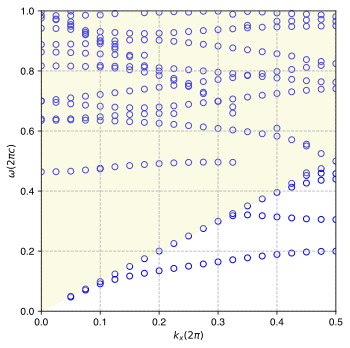

In [17]:
kx = [k.x for k in kpts]
fig = plt.figure(dpi=100, figsize=(5, 5))
ax = plt.subplot(111)
for i in range(len(all_freqs)):
    for ii in range(len(all_freqs[i])):
        plt.scatter(kx[i], np.real(all_freqs[i][ii]), color="b",facecolor='none')

ax.fill_between(kx, kx, 1.0, interpolate=True, color="#F0EFA6", alpha=0.3)
plt.xlim(0, 0.5)
plt.ylim(0, 1)
plt.grid(linestyle='--')
plt.xlabel("$k_x(2\pi)$")
plt.ylabel("$\omega(2\pi c)$")
plt.tight_layout()
plt.show()

The gray shaded region is the light cone, $\omega>ck_x$, which is the region corresponding to modes that are extended in the air surrounding the waveguide. Below the light cone, we see several discrete guided bands, which must have field patterns localized to the vicinity of the waveguide. The imaginary part of $\omega$ for bands below the light cone is very small, due to either numerical error or the finite computational cell size. Some tiny portion of the guided mode overlaps the PML. Note the band gap between the first and second guided mode, from about 0.2 to 0.3.

Inside the light cone, we also see several discrete bands. These are leaky modes, or resonances, which have some intrinsic lifetime/loss because they couple with radiating states inside the light cone, which is reflected in the imaginary parts of their $\omega$. Twice the imaginary part of $\omega$ is the energy loss rate per unit time; for a waveguide, it is more conventional to report loss per unit distance; to get this you would divide the loss per unit time by the group velocity $|d\omega/dk_x| = |\text{slope}|$. Harminv only identifies leaky modes that have a substantial lifetime. The default threshold is a lifetime, or $Q$, of 50 periods.

Computing band diagrams, especially for leaky modes, with a time-domain program like Meep involves several subtleties. For example, the accuracy of Harminv will go down if we specify too large a `df` (too narrow a source), because the increased number of modes makes the signal-processing more ill-conditioned. Sometimes, Harminv will report a spurious mode, which will appear as an isolated dot on the plot. Second, we sometimes have to be careful with modes and especially the imaginary parts to make sure they aren't an artifact of the cell being too small, or the signal-processing error being too large (either because the run is too short or because the bandwidth being searched is too large). Third, currently Meep doesn't attempt to "connect the dots" for the bands — the frequencies are printed in increasing order, but since modes disappear when their losses become too large this means that a single band may be split across several columns.

For example, there seem to be some bands that run right along the edge of the light cone. These are not leaky modes, but are artifacts of the fact that PML boundaries do not absorb well for light that is travelling parallel to the boundary, corresponding to extended modes at the boundary of the light cone. Below, we will see that these modes are not localized to the waveguide.